In [ ]:
import pandas as pd
from pathlib import Path

csv_path = Path('../data/avocado.csv')
df = pd.read_csv(csv_path, parse_dates=['Date'])
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.7,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
type_summary = df.groupby('type')[['AveragePrice', 'Total Volume']].mean().reset_index()
print(type_summary)


           type  AveragePrice  Total Volume
0  conventional      1.158040  1.653213e+06
1       organic      1.653999  4.781121e+04


C:\Users\02900187\AppData\Local\Temp\ipykernel_9248\3659417342.py:16: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\02900187\AppData\Local\Temp\ipykernel_9248\3659417342.py:16: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\02900187\AppData\Local\Temp\ipykernel_9248\3659417342.py:16: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\02900187\AppData\Local\Temp\ipykernel_9248\3659417342.py:16: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\02900187\AppData\Local\Temp\ipykernel_9248\3659417342.py:16: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\02900187\AppData\Local\Temp\ipykernel_9248\3659417342.py:16: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE

<Figure size 1200x600 with 0 Axes>

c:\Users\02900187\Desktop\2025.07.01 실습\avocado_insight\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\02900187\Desktop\2025.07.01 실습\avocado_insight\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\02900187\Desktop\2025.07.01 실습\avocado_insight\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\02900187\Desktop\2025.07.01 실습\avocado_insight\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\02900187\Desktop\2025.07.01 실습\avo

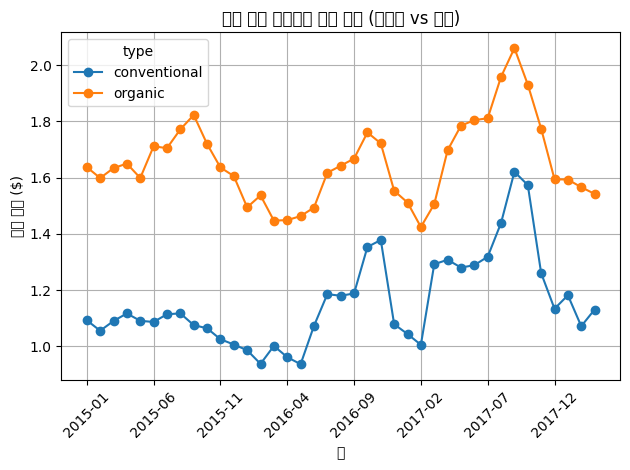

In [5]:
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

monthly_avg = df.groupby(['YearMonth', 'type'])['AveragePrice'].mean().reset_index()

pivot = monthly_avg.pivot(index='YearMonth', columns='type', values='AveragePrice')

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
pivot.plot(marker='o')
plt.title('월별 평균 아보카도 가격 비교 (유기농 vs 일반)')
plt.xlabel('월')
plt.ylabel('평균 가격 ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
region_type = df.groupby(['region', 'type'])['Total Volume'].sum().reset_index()

pivot_region = region_type.pivot(index='region', columns='type', values='Total Volume').fillna(0)

pivot_region['organic_ratio'] = pivot_region['organic'] / (pivot_region['organic'] + pivot_region['conventional'])

top_organic = pivot_region.sort_values('organic_ratio', ascending=False).reset_index()

print(top_organic[['region', 'organic_ratio']].head(10))


type            region  organic_ratio
0              Seattle       0.067423
1     CincinnatiDayton       0.059250
2              Roanoke       0.055477
3           Pittsburgh       0.051814
4             Portland       0.049850
5             Columbus       0.046248
6               Denver       0.043787
7              Detroit       0.042183
8             Syracuse       0.041185
9     BuffaloRochester       0.040207


In [ ]:
avg_price_by_region = df.groupby('region')['AveragePrice'].mean()
pivot_region['avg_price'] = avg_price_by_region

# 평균 가격과 유기농 비율이 함께 높은 지역
print(pivot_region.sort_values(['avg_price'], ascending=False).head(10))


type                 conventional      organic  organic_ratio  avg_price
region                                                                  
HartfordSpringfield  4.906122e+07   1609313.38       0.031760   1.818639
SanFrancisco         1.320443e+08   3785935.69       0.027873   1.804201
NewYork              2.317436e+08   8990571.40       0.037346   1.727574
Philadelphia         6.947969e+07   2359103.38       0.032839   1.632130
Sacramento           7.381266e+07   1351083.14       0.017975   1.621568
Charlotte            3.436287e+07   1192670.66       0.033544   1.606036
Northeast            6.890548e+08  24226096.09       0.033964   1.601923
Albany               1.570061e+07    367188.50       0.022852   1.561036
Chicago              1.284089e+08   5293393.75       0.039591   1.556775
RaleighGreensboro    4.661838e+07   1584356.56       0.032869   1.555118
